In [15]:
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import spatial
import random
from collections import Counter
from math import log,sqrt
from sklearn.decomposition import PCA
import umap


In [2]:
data_path = '../../data/lda_on_whole_dataframe/'

In [3]:
fandom_list = [i for i in os.listdir(data_path) if 'tsv' in i]

In [4]:
fandom_list

['hamilton_miranda_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'harry_potter_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'buffy_the_vampire_slayer_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'dragon_age_all_media_types_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'arthurian_mythology_&_related_fandoms_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'marvel_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'haikyuu_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'one_direction_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'naruto_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'kuroko_no_basuke_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'star_wars_all_media_types_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'dcu_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'les_miserables_all_media_types_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv',
 'attack_on_

### Simple clustering

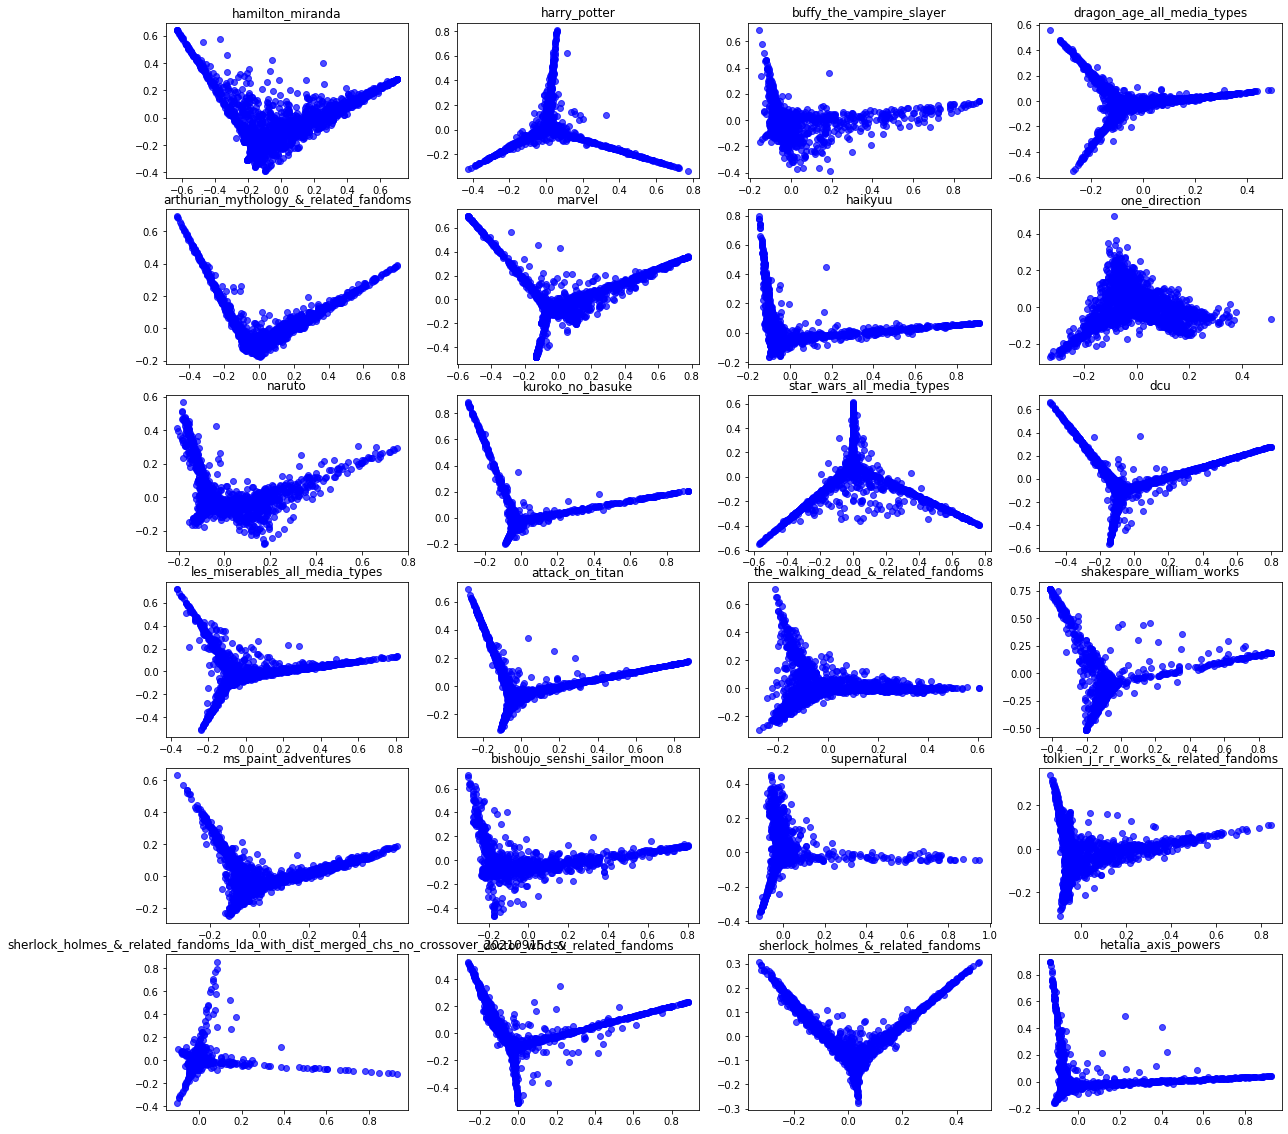

In [14]:
plt.figure(figsize = (20,20))
for i,fandom in enumerate(fandom_list):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)
    pca = PCA(n_components=2)
    dist = [eval(item) for item in df.Dist.values]
    res = pca.fit_transform(dist)
    df['pc1'] = res[:, 0]
    df['pc2'] = res[:, 1]
    plt.subplot(6,4,i+1)
    plt.scatter(df['pc1'], df['pc2'],alpha=0.7,c='blue')
    plt.title(fandom.replace('_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv', ''))
    


(1635, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(910, 2)
(2000, 2)
(1072, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)
(2000, 2)


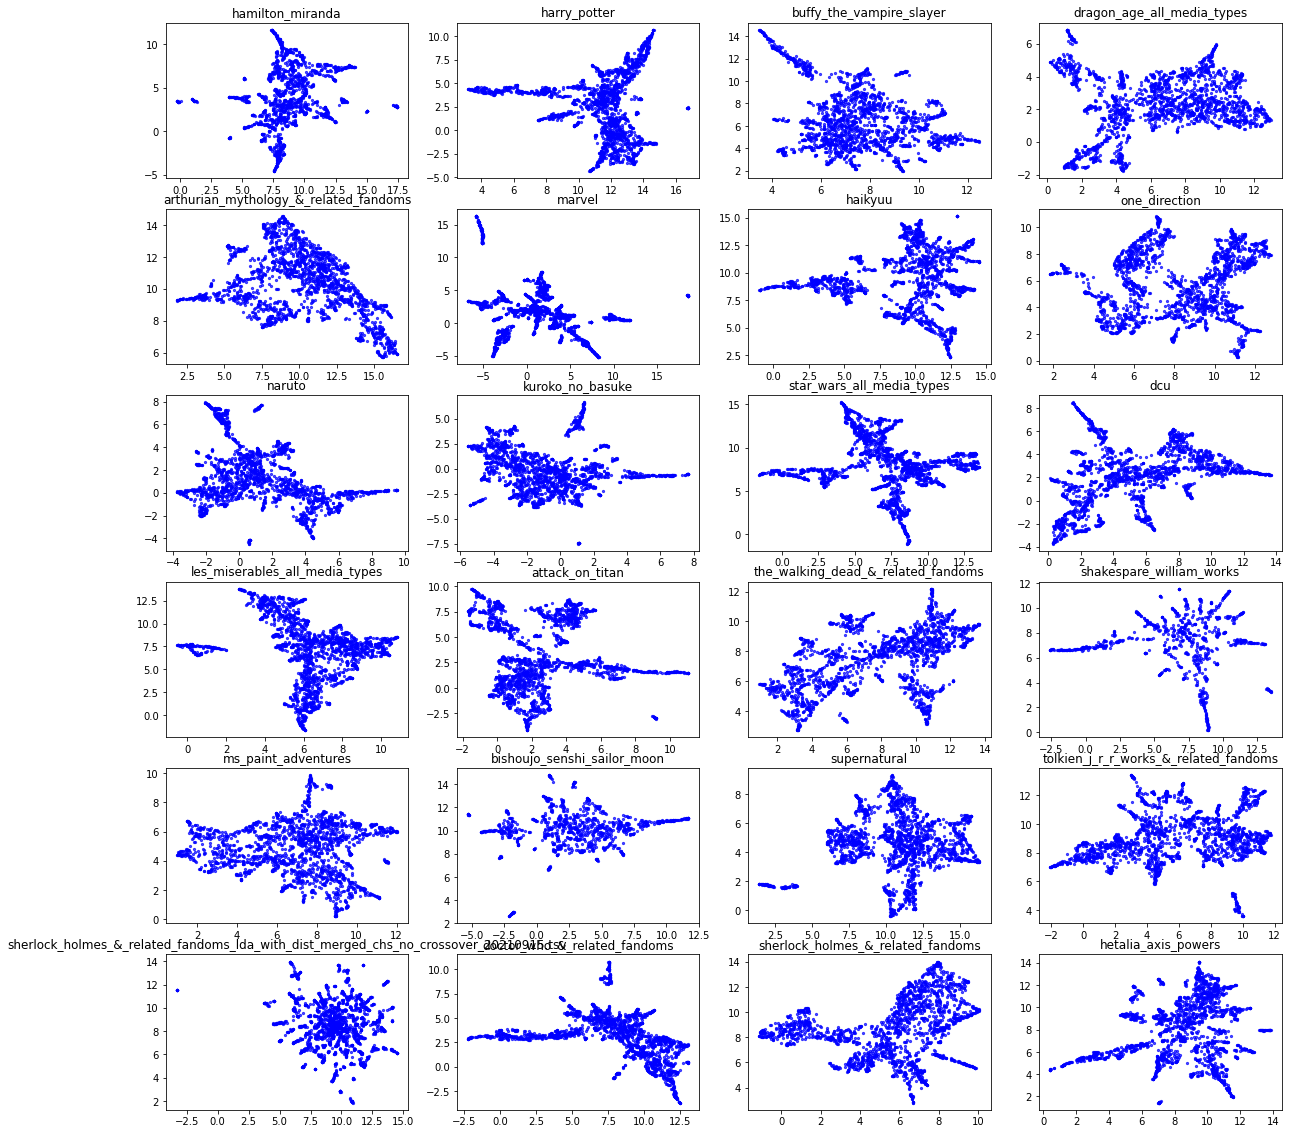

In [20]:
plt.figure(figsize = (20,20))
for i,fandom in enumerate(fandom_list):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t')
    if len(df) > 2000:
        df = df.sample(2000)

    dist = [eval(item) for item in df.Dist.values]
    reducer = umap.UMAP()
    umap_res = reducer.fit_transform(dist)
    print(umap_res.shape)
    df['umap_1'] = umap_res[:, 0]
    df['umap_2'] = umap_res[:, 1]
    plt.subplot(6,4,i+1)
    plt.scatter(df['umap_1'], df['umap_2'],alpha=0.7,c='blue', s=5)
    plt.title(fandom.replace('_lda_with_dist_merged_chs_20210915_whole_dataframe.tsv', ''))
